# Part 1: Predicting Hackernews points with linear regression

## Part 1.1: Data preprocessing

In [53]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/datsoftlyngby/soft2019spring-ai/master/projects/project1/users.json"
data = pd.read_json(data_url)
data.head(3)

,about,created,error,id,karma,submitted
0,NaN,1.510266e+09,NaN,gcgggfxsdg,-1.0,5
1,"Ruby, Open Source, Devops",1.325548e+09,NaN,sheerun,102.0,51
2,NaN,1.459331e+09,NaN,keypress,79.0,70


In [54]:
data = data[data["karma"].notnull()]
data = data[data["created"].notnull()]

In [55]:
import datetime
now = datetime.datetime.now()

def get_days_of_service(created):
    try:
        created_timestamp = int(created)
        created_date = datetime.datetime.fromtimestamp(created_timestamp)
        return (now - created_date).days
    except ValueError:
        print("Not an integer")

data["days since created"] = data.apply(
    lambda row: get_days_of_service(row["created"]), axis=1
)

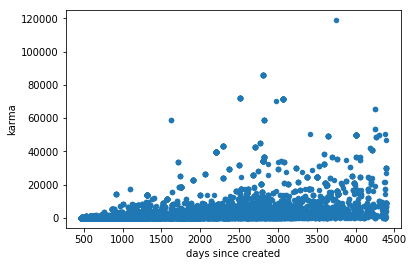

In [56]:
%matplotlib inline
data.plot.scatter(x="days since created", y="karma")

## Part 1.2: Model selection

Linear regration is continous nature when trying to predict output. It is a supervise learning algorithm. We have data available like input data and output data.

## Part 1.3: Model training

In [57]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [58]:
linear_model.fit(data[["days since created"]], data["karma"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
linear_model.coef_

array([3.18378061])

In [60]:
linear_model.intercept_

-2201.5719570327155

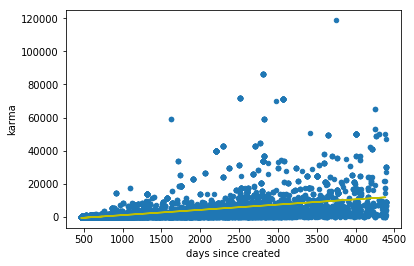

In [61]:
import matplotlib.pyplot as plt
import numpy as np

xs = data["days since created"]
predicted = linear_model.predict(np.array(xs).reshape(-1, 1))
data.plot.scatter(x="days since created", y="karma")
plt.plot(xs, predicted, "y")

## Part 1.4: Model evaluation

### 1.4.1 A description of the model parameters

The model is described by following equation:

    f(x) = ax + b
    
*a* (coefficient) defines the slobe of the line. If *a* is positive the line is rising, and if *a* is negative the slobe is falling.

*b* (intercept) defines the point where the line is crossing the y axis.

### 1.4.2 A visual plot of the model that explains the description above.

*a* (coefficient)

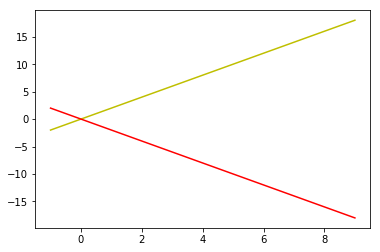

In [62]:
ex_range = np.arange(-1,10)

plt.plot(ex_range, 2 * ex_range, "y")
plt.plot(ex_range, -2 * ex_range, "r")

*b* (intercept)

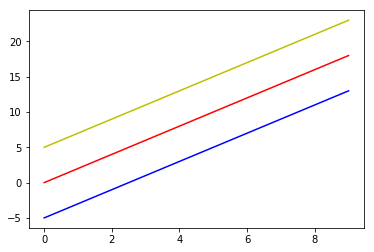

In [63]:
ex_range = np.arange(0,10)

plt.plot(ex_range, 2 * ex_range + 5, "y")
plt.plot(ex_range, 2 * ex_range, "r")
plt.plot(ex_range, 2 * ex_range - 5, "b")

### 1.4.3 Explain: What does it take to get 1000 points? How long would you have to be active on Hackernews?

By isolation of x in the linear equation we get the calculation needed to answer this question.

y = ax + b

x = (y - b) / a

In [64]:
def days_before_points(karma_points):
    return (karma_points - linear_model.intercept_)/linear_model.coef_

days_before_points(1000)

array([1005.58811845])

So the answer is that it takes roughly the above specified value marks the number of days to get 1000 karma points.

# Part 2: Predicting Hackernews points with multivariate linear regression

### Data preprocessing

In [65]:
data = data[data["submitted"].notnull()]

### Model training

In [66]:
from sklearn.linear_model import LinearRegression
multiple_model = LinearRegression()

In [67]:
xs = data[["days since created", "submitted"]]

multiple_model.fit(xs, data["karma"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
predicted = multiple_model.predict(xs)
predicted

array([-475.64061258,  884.33510992,   38.82790481, ..., 4810.08677336,
        776.66493767, -288.81356229])

In [69]:
multiple_model.coef_

array([0.57885067, 2.66071728])

coefficienter agerer weight for diverse x'er

In [70]:
multiple_model.intercept_

-760.4251621280237

### A description of the parameters

y = ax_1 +bx_2 +c

*y* is the dependant variable meaning the value that we want to predict

*x_1* is the first explanatory variable which in our case represents the  amount of days that the user have been active

*x_2* is the second explanatory variable which represents the number of posts submitted by the user

*a* is the coefficient of *x_1*. *a* acts as a weight factor of how influential *x_1* is. The further away *a* is from zero the bigger an influence *x_1* have on the result.

*b* is the coefficient related to *x_2* influence *x_2* in the same way as *a* influences *x_1*

### An analysis of how much time you need to be active on Hackernews, plus how many posts you need to reach 1000 points.

Gaining 1000 points on the hacker news platform can statistically be achieved by adjusting the x_1 and x_2 variables. Since we want to achieve 1000 points we can isolate either of the *x* variables in order to express their relation with an equation. Below we have isolated x_1.

y = ax_1 +bx_2 +c

x_1 = (y -bx_2 -c)/a

We can now plot this equation from a range of given x_2 values in order to visualise their relationship.

In [71]:
y = 1000
a = multiple_model.coef_[0]
b = multiple_model.coef_[1]
c = multiple_model.intercept_

In [72]:
def x_1_isolated(x_2):
    return (y -(b * x_2) -c)/a

In [73]:
ex_x_range = np.arange(0,700)

In [74]:
ex_y_range = [x_1_isolated(val) for val in list(ex_x_range)]

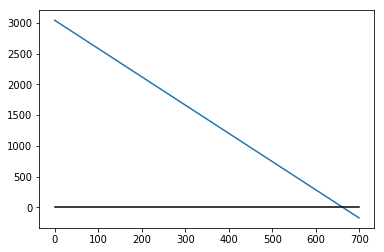

In [75]:
plt.plot(ex_x_range, ex_y_range)
plt.plot(ex_x_range, [0 for val in list(ex_x_range)], "k")

The above visualized function takes in any given number of user posts and allows us to calculate how long a user should be active in order to achieve 1000 karma points.

### Explain: how much does the number of posts contribute to get the points? How much do the time since registration explain?

The number of posts contributes this much to get the karma points:

In [76]:
b

2.6607172843649116

The time since registration contributes this much to get the karma points:

In [77]:
a

0.5788506676442293

In [78]:
%reset -f

# Part 3: Prediction of breast cancer with logistic regression

# Part 3: Prediction of breast cancer with logistic regression

In [79]:
import numpy as np
import pandas as pd  # for matrix and array operation
from sklearn.metrics import accuracy_score # Find accuracy score from dataset
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder # Convert catagorical to numarical featere
from sklearn.model_selection import train_test_split #traing testing dataset convert split

In [80]:
dataset = pd.read_csv("https://raw.githubusercontent.com/OnkelDunkel/AIAssignment1/master/data.csv")

### 3.1: Looking at the data  

#### Report the head of the table. 

In [81]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


###  How big is your dataset?  569 rows × 32 columns

In [82]:
dataset.shape

(569, 33)

### What are the different variables? Write two lines about notable features of the data.

The most notable feature is the classification field (Diagnosis) which give information either the patent cancer is benign or malign.

In [83]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [84]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


 ### 3.2: Building the model

#### Data preprocessing

In [85]:
le = LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis'])

In [86]:
Y = dataset.diagnosis

In [87]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [88]:
X = dataset.drop(['diagnosis', 'id', 'Unnamed: 32'], axis =1)

In [89]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
def splitting(X,Y):
    return train_test_split(X,Y, test_size = 0.30, random_state =42)

X_train, X_test, Y_train, Y_test = splitting(X,Y)

In [91]:
X_train.shape

(398, 30)

In [92]:
X_test.shape

(171, 30)

### 3.3 Evaluating the model


Now take the data from dataset and train your logistic regression model. To figure out how good your model was, use the function here sklearn.metrics.accuracy_score. It gives you an accuracy that tells you how good your model is able to predict whether a tumor is benign or malignant.

Hand-in: The accuracy of the score as well as two lines describing what that number actually mean. What can the number tell you when you inform patiens whether their cancer is benign or malign?

#### Training the model

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
lr = LogisticRegression();

In [95]:
lr.fit(X_train,Y_train)

/home/ras/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### How well does the model fit?

In [96]:
Y_pred = lr.predict(X_test)

In [97]:
accuracy = accuracy_score(Y_test,Y_pred)

In [98]:
accuracy

0.9649122807017544

In [99]:
# need to find thesold valu use sigmoid function.

In [100]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, Y_pred)
print(cm)

[[106   2]
 [  4  59]]


In [101]:
accuracy =  165/171 #106+60/106+60+3+2

In [102]:
accuracy

0.9649122807017544

#### What can the number tell you when you inform patiens whether their cancer is benign or malign?
We can say that our result is built on a statistical model. We do not know for sure that our result is correct but according to our numbers there are a 96% that our model is correct.